# GRIP At The Sparks Foundation

## Name: Bagwe Sarvesh

### Task 1 : Prediction Using Supervised ML

#### Predict the percentage of an student based on the no. of study hours

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
marks = pd.read_csv('Supervise_ML.csv') #importing the data 

In [3]:
marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
marks.info() #To check wether the entry of any value in the data is null or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
marks.describe() #stats regarding our data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
marks.corr() #It shows the correlation between the Hours and scores(How much does the hours affect the score)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Plotting the Data 

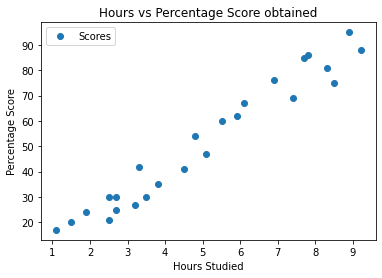

In [7]:
marks.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Score obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Creating Training set and Testing set 

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(marks, test_size=0.2, random_state=42)


In [9]:
X = train_set.iloc[:, :-1].values  #Hours for training set
y = train_set.iloc[:, 1].values    #Scores for training set
X_test=test_set.iloc[:,:-1].values #Hours for test set
Y_real=test_set.iloc[:,1].values   #Score actuals to compare with predicted values


## Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X, y) 

print("Training completed successfully")

Training completed successfully


#### Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. The portion of code written below will give us intercept and slope for dataset

In [11]:
print("Regression Intercept")
print(regressor.intercept_)
print("Regression Coefficent") #It gives us measure of change per unit
print(regressor.coef_)

Regression Intercept
2.826892353899737
Regression Coefficent
[9.68207815]


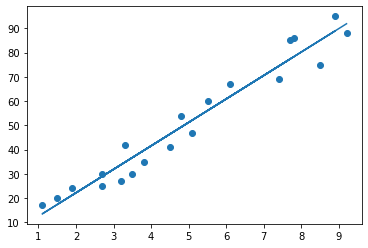

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Prediction using Test set (testing)

In [13]:
y_pred =regressor.predict(X_test)
cmp=pd.DataFrame({'Actual':Y_real,'Predicted':y_pred})
cmp

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Making Predictions 

In [14]:
hours = 9.25
New_pred = regressor.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score =",(New_pred[0]),"%")

No of Hours = 9.25
Predicted Score = 92.38611528261494 %


## Evaluating the model

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_real, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_real, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_real, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
